<a href="https://colab.research.google.com/github/Imanhamza/twc_CaseStudy/blob/main/twc_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
main_df = pd.read_excel('/content/Copy of [Name_Submitted Date]_TWC_Case Study.xlsx', sheet_name= 'Data')
cpt_info = pd.read_excel('/content/Copy of [Name_Submitted Date]_TWC_Case Study.xlsx', sheet_name= 'CPT Info')
contract_info = pd.read_excel('/content/Copy of [Name_Submitted Date]_TWC_Case Study.xlsx', sheet_name= 'Contract Info')
rev = pd.read_excel('/content/Copy of [Name_Submitted Date]_TWC_Case Study.xlsx', sheet_name= 'Cost as % of MCA or Rev')

In [3]:
main_df.head

<bound method NDFrame.head of        Person Number charge DOS     Contract      COB1     Location  \
0            21913.0 2020-01-06   Contract 1    COB1 4   Location 4   
1            11093.0 2020-01-02   Contract 1    COB1 6   Location 6   
2            23853.0 2018-09-07   Contract 5    COB1 9   Location 8   
3            20696.0 2018-07-25   Contract 5    COB1 9  Location 10   
4            23853.0 2018-09-26   Contract 5    COB1 9  Location 14   
...              ...        ...          ...       ...          ...   
10315         1667.0 2020-08-25  Contract 77  COB1 139  Location 35   
10316         1667.0 2020-08-25  Contract 77  COB1 139  Location 35   
10317         1667.0 2020-08-25  Contract 77  COB1 139  Location 35   
10318         8983.0 2020-06-09  Contract 35   COB1 63   Location 4   
10319         8983.0 2020-06-09  Contract 35   COB1 63   Location 4   

          Physician  Patient Age     Cpt Type  Co-Payment  Encounter Number  \
0       Physician 4         73.0     L

In [4]:
cpt_info.head

<bound method NDFrame.head of            Code Desc              Cpt Type Service Item Id  Medicare Allowable
0    Lucentis Delive              Lucentis      LUCEN_DELV            0.000000
1    Eylea Delivered                 Eylea      EYLEA_DELV            0.000000
2    Walk Out Not Se                 Other        Walk Out            0.000000
3    Medical Records                 Other            Misc            0.000000
4    Incomplete Exam                 Other       No Charge            0.000000
..               ...                   ...             ...                 ...
125  Repr Lacerat; A  Non-Cataract Surgery         65286.0          758.000696
126  PHONE E/M PHYS/           Office Code         99441.0           15.639067
127  PHONE E/M PHYS/           Office Code         99442.0           31.104904
128  Exc Ben Les Fac                 Other         11440.0          151.953095
129  Prophylaxis Ret                 Other         67145.0          573.044383

[130 rows x 4 columns

In [5]:
contract_info.head

<bound method NDFrame.head of     Number      Contract  Number.1     COB 1 Fin Class         LOB  Number.2  \
0      1.0    Contract 1       4.0    COB1 4       FFS    Medicare       NaN   
1      1.0    Contract 1       6.0    COB1 6       FFS    Medicare       NaN   
2      5.0    Contract 5       9.0    COB1 9  Self-Pay  Commercial       NaN   
3      8.0    Contract 8      13.0   COB1 13       FFS  Commercial       2.0   
4     12.0   Contract 12      18.0   COB1 18       FFS    Medicare       6.0   
..     ...           ...       ...       ...       ...         ...       ...   
78    42.0   Contract 42      53.0   COB1 53       CAP    Medicare      11.0   
79   117.0  Contract 117     214.0  COB1 214       CAP  Commercial       NaN   
80    29.0   Contract 29     168.0  COB1 168       CAP    Medicare       NaN   
81   121.0  Contract 121     215.0  COB1 215       CAP    Medicare       NaN   
82     8.0    Contract 8     147.0  COB1 147       CAP  Commercial       2.0   

       TP

In [6]:
rev.head

<bound method NDFrame.head of                 Cpt Type  % of MCA  % of Revenue
0               Lucentis      0.65           0.9
1                  Eylea      0.65           0.9
2                  Other      0.65           0.9
3                Avastin      0.65           0.9
4                    OCT      0.65           0.9
5            Office Code      0.75           0.9
6                Post-op      0.95           0.9
7          Retinal Laser      0.60           0.9
8              SLT Laser      0.55           0.9
9           Visual Field      0.95           0.9
10       Plastic Surgery      0.95           0.9
11     Other Injectables      0.65           0.9
12               Ozurdex      0.65           0.9
13      Cataract Surgery      0.60           0.9
14              Glaucoma      0.75           0.9
15        Glaucoma Laser      0.75           0.9
16  Non-Cataract Surgery      0.80           0.9
17        Yag & PI Laser      0.55           0.9
18       Retinal Surgery      0.85     

### Which Patient Type in Location 10 brought the Most revenue in 2019?
**Done**

In [7]:
main_df['charge DOS'] = pd.to_datetime(main_df['charge DOS'],format='%Y%m%d')

In [8]:
temp_df = main_df[(pd.DatetimeIndex(main_df['charge DOS']).year == 2019) & (main_df['Location'] == 'Location 10')]

In [9]:
rev_temp = temp_df.groupby('Patient Type')['Revenue'].sum()

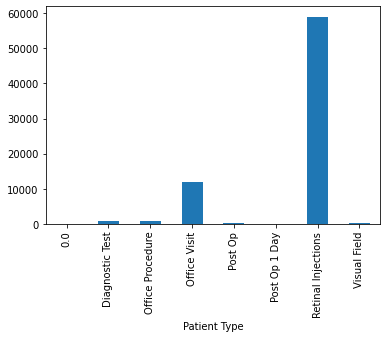

In [10]:
rev_temp.plot.bar()

### Which location saw the biggest increase in total patient volume %? what %?  (1/1/2020-3/16/2020  vs 3/17/2020-6/30/2020)
**Done**

In [11]:
volume1 = main_df[(main_df['charge DOS'] >= '1/1/2020') & (main_df['charge DOS'] <= '3/16/2020')]
volume2 = main_df[(main_df['charge DOS'] >= '3/17/2020') & (main_df['charge DOS'] <= '6/30/2020')]

In [12]:
count1 = volume1.groupby('Location')['Person Number'].count()
count1 = count1.to_frame()

In [13]:
count2 = volume2.groupby('Location')['Person Number'].count()
count2 = count2.to_frame()

In [14]:
for i, j in zip(count1, count2):
  print(((count2[j]-count1[i])/count1[i])*100)

Location
Location 10     33.333333
Location 14    -37.500000
Location 18     52.380952
Location 23     11.111111
Location 29    -83.333333
Location 31     22.916667
Location 35    -32.812500
Location 4     -11.151079
Location 44    -50.000000
Location 45           NaN
Location 6      -4.651163
Location 8     207.692308
Name: Person Number, dtype: float64


### Do females or males bring in more revenue/patient?
**Done**

In [15]:
gender_temp = main_df.groupby('Patient Gender')['Revenue'].sum()

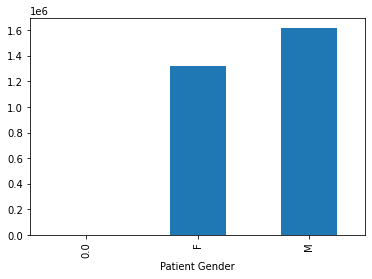

In [16]:
gender_temp.plot.bar()

### What is the cost/patient of our most costly patient type? Which patient type?
**Not Done**

In [17]:
merged_df1 = pd.merge(main_df, cpt_info, on='Cpt Type')
merged_df2 = pd.merge(merged_df1, rev, on = 'Cpt Type')

In [18]:
for i in merged_df2['Revenue']:
  if i == 0.0:
    merged_df2['cost'] = merged_df2['Medicare Allowable']*merged_df2['% of MCA']
    merged_df2['profit'] = merged_df2['Medicare Allowable'] - merged_df2['cost']
  else:
    merged_df2['cost'] = merged_df2['Revenue'] * merged_df2['% of Revenue']
    merged_df2['profit'] = merged_df2['Revenue'] - merged_df2['cost']
merged_df2

,Person Number,charge DOS,Contract,COB1,Location,Physician,Patient Age,Cpt Type,Co-Payment,Encounter Number,...,Patient Gender,CPT,Revenue,Code Desc,Service Item Id,Medicare Allowable,% of MCA,% of Revenue,cost,profit
0,21913.0,2020-01-06,Contract 1,COB1 4,Location 4,Physician 4,73.0,Lucentis,0.0,5.0,...,M,LUCEN_DELV,1823.640,Lucentis Delive,LUCEN_DELV,0.0,0.65,0.9,1641.2760,182.3640
1,21913.0,2020-01-06,Contract 1,COB1 4,Location 4,Physician 4,73.0,Lucentis,0.0,5.0,...,M,LUCEN_DELV,1823.640,Lucentis - Samp,LUCEN_SAMP,0.0,0.65,0.9,1641.2760,182.3640
2,21913.0,2020-01-06,Contract 1,COB1 4,Location 4,Physician 4,73.0,Lucentis,0.0,5.0,...,M,LUCEN_DELV,1823.640,Lucentis 0.5 Mg,J2778,0.0,0.65,0.9,1641.2760,182.3640
3,18623.0,2019-05-09,Contract 1,COB1 4,Location 4,Physician 4,69.0,Lucentis,0.0,1599.0,...,F,LUCEN_DELV,1823.640,Lucentis Delive,LUCEN_DELV,0.0,0.65,0.9,1641.2760,182.3640
4,18623.0,2019-05-09,Contract 1,COB1 4,Location 4,Physician 4,69.0,Lucentis,0.0,1599.0,...,F,LUCEN_DELV,1823.640,Lucentis - Samp,LUCEN_SAMP,0.0,0.65,0.9,1641.2760,182.3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160144,5129.0,2020-09-04,Contract 40,COB1 50,Location 4,Physician 4,85.0,Beovu,0.0,28224.0,...,F,Beovu_Delv,2481.220,Beovu Delivered,Beovu_Delv,0.0,0.65,0.9,2233.0980,248.1220
160145,5129.0,2020-11-05,Contract 40,COB1 50,Location 4,Physician 4,85.0,Beovu,0.0,28233.0,...,F,Beovu_Delv,2481.220,Beovu Sample,Beovu_smpl,0.0,0.65,0.9,2233.0980,248.1220
160146,5129.0,2020-11-05,Contract 40,COB1 50,Location 4,Physician 4,85.0,Beovu,0.0,28233.0,...,F,Beovu_Delv,2481.220,Beovu Delivered,Beovu_Delv,0.0,0.65,0.9,2233.0980,248.1220
160147,16046.0,2020-04-21,Contract 16,COB1 108,Location 6,Physician 4,71.0,Kenalog,0.0,28414.0,...,M,KENAL_DELV,17.696,Kenalog Deliver,KENAL_DELV,0.0,0.65,0.9,15.9264,1.7696


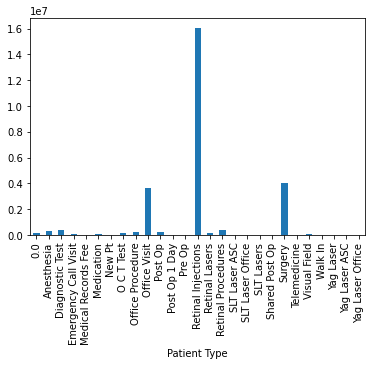

In [19]:
(merged_df2.groupby('Patient Type')['cost'].sum()).plot.bar()

In [20]:
# Total cost of all patients
merged_df2[merged_df2['cost'] == merged_df2['cost'].max()]

,Person Number,charge DOS,Contract,COB1,Location,Physician,Patient Age,Cpt Type,Co-Payment,Encounter Number,...,Patient Gender,CPT,Revenue,Code Desc,Service Item Id,Medicare Allowable,% of MCA,% of Revenue,cost,profit
1191,11322.0,2020-04-22,Contract 46,COB1 72,Location 14,Physician 18,62.0,Eylea,0.0,6467.0,...,M,J0178b,2627.646,Eylea Delivered,EYLEA_DELV,0.0,0.65,0.9,2364.8814,262.7646
1192,11322.0,2020-04-22,Contract 46,COB1 72,Location 14,Physician 18,62.0,Eylea,0.0,6467.0,...,M,J0178b,2627.646,Aflibercept Inj,J0178,0.0,0.65,0.9,2364.8814,262.7646
1193,11322.0,2020-04-22,Contract 46,COB1 72,Location 14,Physician 18,62.0,Eylea,0.0,6467.0,...,M,J0178b,2627.646,Eylea - Sample,EYLEA_SAMP,0.0,0.65,0.9,2364.8814,262.7646
1194,11322.0,2020-04-22,Contract 46,COB1 72,Location 14,Physician 18,62.0,Eylea,0.0,6467.0,...,M,J0178b,2627.646,Eylea Prefilled,J0178b,0.0,0.65,0.9,2364.8814,262.7646


### Which Physician was the most profitable on a per patient basis? What profit?
**Not Done**


In [27]:
#Total profit for the pyhsciain
ph_df = (merged_df2.groupby('Physician')['profit'].sum()).to_frame()
ph_df[ph_df['profit'] == ph_df['profit'].max()]

,profit
Physician,
Physician 4,1.040781e+06


In [28]:
#Number of patient for this physicain
ph_p = merged_df2[merged_df2['Physician'] == 'Physician 4']
ph_p_df = (ph_p.groupby('Physician')['Person Number'].count()).to_frame()
ph_p_df

,Person Number
Physician,
Physician 4,57020


In [31]:
ph_df['profit'].max()

1040781.0900500439

### Which doctor saw the highest volume of unique Medicare Patients
**Done**

In [63]:
contract_df = pd.merge(merged_df2, contract_info, right_on='COB 1', left_on = 'COB1')
contract_df = contract_df[['Person Number', 'LOB', 'Fin Class','Physician', 'profit']]
contract_df

,Person Number,LOB,Fin Class,Physician,profit
0,21913.0,Medicare,FFS,Physician 4,182.3640
1,21913.0,Medicare,FFS,Physician 4,182.3640
2,21913.0,Medicare,FFS,Physician 4,182.3640
3,18623.0,Medicare,FFS,Physician 4,182.3640
4,18623.0,Medicare,FFS,Physician 4,182.3640
...,...,...,...,...,...
213314,18218.0,Medicaid,CAP,Physician 48,30.7566
213315,18218.0,Medicaid,CAP,Physician 48,30.7566
213316,18218.0,Medicaid,CAP,Physician 48,30.7566
213317,18218.0,Medicaid,CAP,Physician 48,30.7566


In [51]:
contract_df = contract_df[contract_df['LOB'] == 'Medicare']
con_df =(contract_df.groupby('Physician')['Person Number'].count()).to_frame()
con_df[con_df['Person Number'] == con_df['Person Number'].max()]

,Person Number
Physician,
Physician 4,60043


### What is the average age of a female Glaucoma & Glaucoma Laser patient in 2019?
**Done**


In [24]:
gla_df = main_df[(main_df['Patient Gender'] == 'F') & (pd.DatetimeIndex(main_df['charge DOS']).year == 2019)& (main_df['Cpt Type'].isin([' Glaucoma','Glaucoma Laser']))]

In [25]:
gla_df['Patient Age'].mean()

74.5

### Which patient type drives the most revenue/encounter and profit/encounter? What was Revenue by Encounter/ Profit/Encounter?

In [45]:
rev_enc = merged_df2.groupby(['Patient Type', 'Encounter Number'])[['Revenue', 'profit']].sum()
rev_enc[(rev_enc['Revenue']==rev_enc['Revenue'].max())&(rev_enc['profit']==rev_enc['profit'].max())]

Revenue      profit
Patient Type Encounter Number                        
Office Visit 21538.0           108121.118  10812.1118
             21551.0           108121.118  10812.1118

### Which contract type is most profitable per patient/what profit?


In [60]:
p_df =(contract_df.groupby('LOB')['profit'].sum()).to_frame()
p_df[p_df['profit']==p_df['profit'].max()]

,profit
LOB,
Medicare,3.076514e+06


In [61]:
pp_df =(contract_df.groupby('LOB')['Person Number'].count()).to_frame()
pp_df[pp_df['Person Number']== pp_df['Person Number'].max()]

,Person Number
LOB,
Medicare,174984


In [62]:
p_df['profit'].max()/pp_df['Person Number'].max()

17.58168805950838

### What is the total profit on FFS patients?

In [65]:
ffs_df = contract_df[contract_df['Fin Class'] == 'FFS']
(ffs_df.groupby('Fin Class')['profit'].sum()).to_frame()

,profit
Fin Class,
FFS,1.644534e+06
